# Predicting house prices: A regression example

In [2]:
from tensorflow import keras
from keras import layers

In [1]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 1us/step


In [4]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
train_targets.shape

(404,)

In [8]:
print(train_targets[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [9]:
mean = train_data.mean(axis=0)
train_data -= mean

In [10]:
std = train_data.std(axis=0)
train_data /= std

In [11]:
test_data -= mean
test_data /= std

In [13]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [15]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis = 0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [16]:
all_scores

[1.965757131576538, 2.534121036529541, 2.5135490894317627, 2.4758048057556152]

In [17]:
np.mean(all_scores)

2.3723080158233643

In [18]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis = 0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                       validation_data=(val_data, val_targets),
                       epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [22]:
average_mae_history = \
    [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [25]:
import matplotlib.pyplot as plt

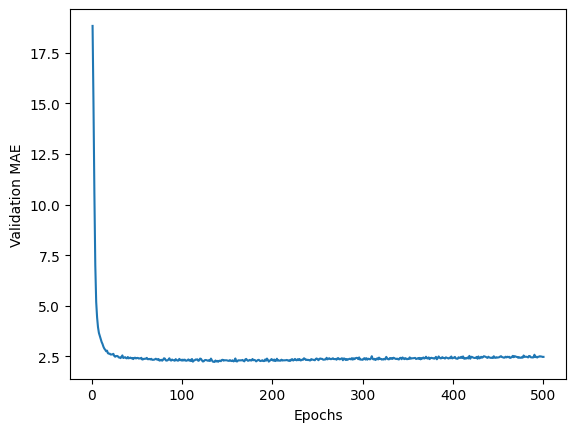

In [26]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

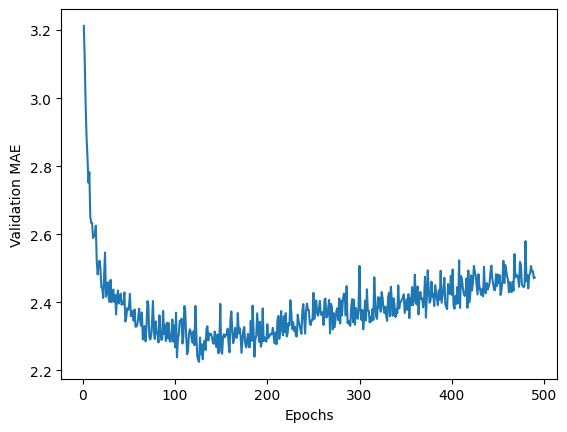

In [27]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [28]:
model = build_model()
model.fit(train_data, train_targets,
         epochs = 130, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 0s/step - loss: 13.8578 - mae: 2.5281


In [29]:
test_mae_score

2.528148651123047

In [30]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 5ms/step


In [31]:
predictions[0]

array([9.4908495], dtype=float32)